In [784]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [156]:
url = "https://raw.githubusercontent.com/foxdocs/cph-bi-2024/refs/heads/main/Data/house-data.csv"
df = pd.read_csv(url)
df = df.drop('id',axis=1)

In [157]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [158]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [162]:
df = df.drop('date', axis=1)

In [164]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [168]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [289]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [179]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

In [220]:
df_final = df.drop(['condition','sqft_lot','zipcode','yr_built','sqft_lot15','lat','long','bedrooms','waterfront','view','yr_renovated'
                   ,'floors','sqft_basement'],axis=1)

In [222]:
correlation_matrix2 = df_final.corr()
print(correlation_matrix2)

                  price  bathrooms  sqft_living     grade  sqft_above  \
price          1.000000   0.525138     0.702035  0.667434    0.605567   
bathrooms      0.525138   1.000000     0.754665  0.664983    0.685342   
sqft_living    0.702035   0.754665     1.000000  0.762704    0.876597   
grade          0.667434   0.664983     0.762704  1.000000    0.755923   
sqft_above     0.605567   0.685342     0.876597  0.755923    1.000000   
sqft_living15  0.585379   0.568634     0.756420  0.713202    0.731870   

               sqft_living15  
price               0.585379  
bathrooms           0.568634  
sqft_living         0.756420  
grade               0.713202  
sqft_above          0.731870  
sqft_living15       1.000000  


In [224]:
df_final.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


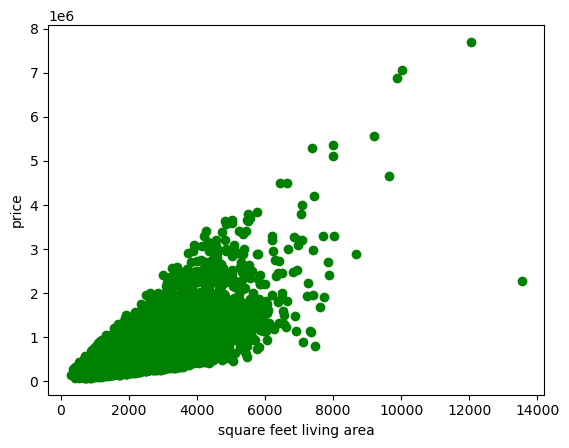

In [287]:
plt.xlabel('square feet living area')
plt.ylabel('price')
plt.scatter(df_final.sqft_living,df_final.price,color= 'green')
plt.show()

<Axes: >

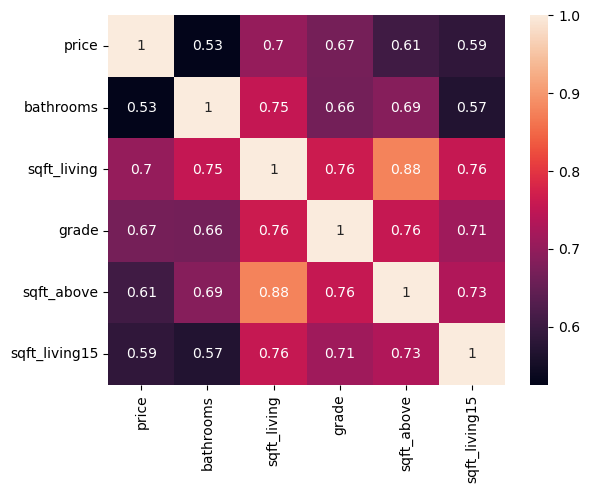

In [307]:
sns.heatmap(correlation_matrix2, annot=True)

# Linear Regression

In [431]:
X = df_final['sqft_living'].values.reshape(-1, 1)
y = df_final['price'].values.reshape(-1, 1)

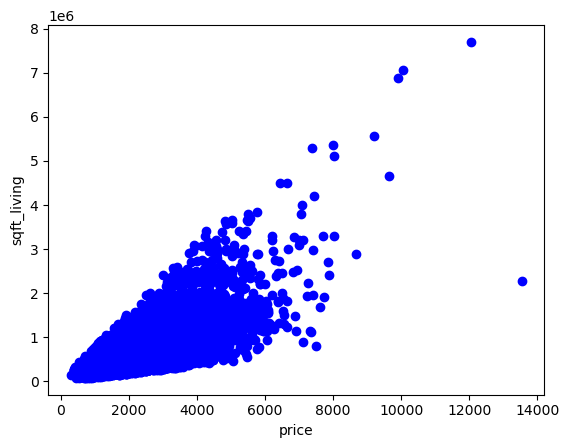

In [433]:
plt.ylabel('sqft_living')
plt.xlabel('price')
plt.scatter(X, y, color='blue')
plt.show()

In [740]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15) 

In [742]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18371, 1)
(18371, 1)
(3242, 1)
(3242, 1)


In [744]:
y_test

array([[ 459000.],
       [ 445000.],
       [1057000.],
       ...,
       [ 505000.],
       [ 715000.],
       [ 353000.]])

In [746]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg

LinearRegression()

In [748]:
a = linreg.coef_
b = linreg.intercept_

In [750]:
a

array([[280.46173263]])

In [752]:
b

array([-43250.41440399])

In [754]:
y_predicted = linreg.predict(X_test)
y_predicted

array([[739237.81962359],
       [413902.209777  ],
       [621443.89192051],
       ...,
       [601811.57063667],
       [643880.83053062],
       [489626.87758612]])

In [756]:
y_test

array([[ 459000.],
       [ 445000.],
       [1057000.],
       ...,
       [ 505000.],
       [ 715000.],
       [ 353000.]])

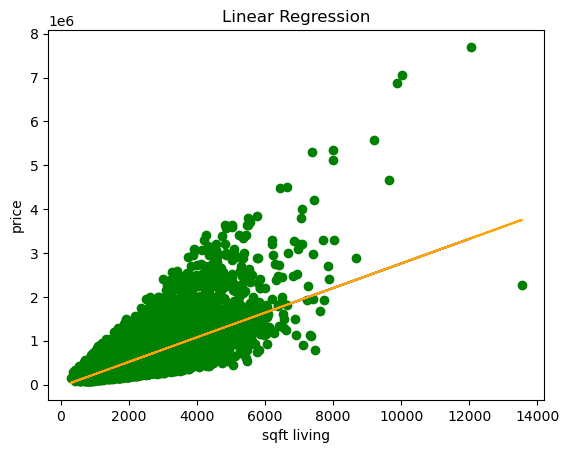

In [758]:
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('sqft living')
plt.ylabel('price')
plt.show()

In [760]:
lin_r2= linreg.score(X,y)
lin_r2

0.49285305369801735

In [762]:
age_predicted = linreg.predict([[2570]])
age_predicted

array([[677536.23844579]])

In [764]:
age_predict = a*2570 + b
age_predict

array([[677536.23844579]])

In [766]:
sqft_living = 3000
age_predicted = linreg.predict([[sqft_living]])
age_predicted

array([[798134.78347513]])

In [768]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

174798.78113091513


In [770]:
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

74744588930.51274


In [772]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

273394.5663880552


In [774]:
eV = round(metrics.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.49


In [776]:
r2_score(y_test, y_predicted)

0.4910058627910614

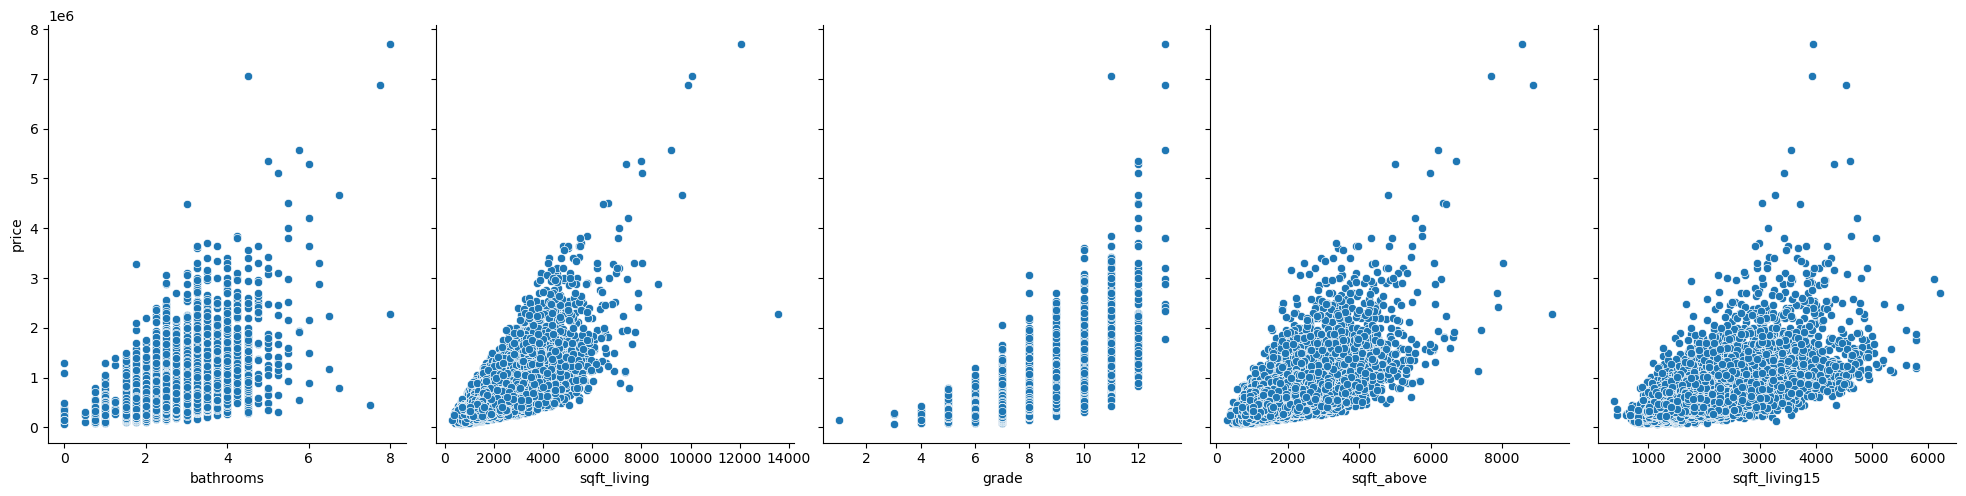

In [778]:
sns.pairplot(df_final,x_vars=['bathrooms','sqft_living','grade','sqft_above','sqft_living15'],y_vars='price',height=5,aspect=0.8)

# Multiple Linear Regression

In [524]:
feature_cols = ['bathrooms','sqft_living','grade','sqft_above','sqft_living15']
mlr_X = data[feature_cols]
mlr_X.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.000,1180,7,1180,1340
1,2.250,2570,7,2170,1690
2,1.000,770,6,770,2720
3,3.000,1960,7,1050,1360
4,2.000,1680,8,1680,1800


In [526]:
print(type(mlr_X))
print(mlr_X.shape)

<class 'pandas.core.frame.DataFrame'>
(21613, 5)


In [528]:
mlr_y = data['price']
mlr_y.head()

0   221900.000
1   538000.000
2   180000.000
3   604000.000
4   510000.000
Name: price, dtype: float64

In [530]:
print(type(mlr_y))
print(mlr_y.shape)

<class 'pandas.core.series.Series'>
(21613,)


In [532]:
mlr_X_train, mlr_X_test, mlr_y_train, mlr_y_test = train_test_split(mlr_X, mlr_y, random_state=1)

In [534]:
print(mlr_X_train.shape)
print(mlr_y_train.shape)
print(mlr_X_test.shape)
print(mlr_y_test.shape)

(16209, 5)
(16209,)
(5404, 5)
(5404,)


In [536]:
mlinreg = LinearRegression()

In [538]:
mlinreg.fit(mlr_X_train,mlr_y_train)

LinearRegression()

In [540]:
print('b0 =', mlinreg.intercept_)
print('bi =', mlinreg.coef_)

b0 = -634833.879649452
bi = [-3.55428200e+04  2.36713772e+02  1.11340493e+05 -7.73725638e+01
  2.08007492e+01]


In [542]:
list(zip(feature_cols, mlinreg.coef_))

[('bathrooms', -35542.81997484944),
 ('sqft_living', 236.71377239856818),
 ('grade', 111340.49306565442),
 ('sqft_above', -77.37256378631585),
 ('sqft_living15', 20.800749152944775)]

In [544]:
mlr_y_test

15544    459000.000
17454    445000.000
21548   1057000.000
3427     732350.000
8809     235000.000
            ...    
12416    680000.000
8253     267500.000
4251     725000.000
11404    253500.000
13206    324950.000
Name: price, Length: 5404, dtype: float64

In [546]:
mlr_y_predicted = mlinreg.predict(mlr_X_test)

In [548]:
mlr_y_predicted

array([774371.94758233, 382760.83094408, 994526.87025188, ...,
       748544.01777148, 226175.7618874 , 426688.13436136])

In [550]:
print(metrics.mean_absolute_error(mlr_y_test, mlr_y_predicted))

160872.73635217862


In [552]:
print(metrics.mean_squared_error(mlr_y_test, mlr_y_predicted))

72570644848.67125


In [554]:
print(np.sqrt(metrics.mean_squared_error(mlr_y_test, mlr_y_predicted)))

269389.3926060773


In [556]:
mlr_eV = round(metrics.explained_variance_score(mlr_y_test, mlr_y_predicted), 6)
print('Explained variance score ',mlr_eV )

Explained variance score  0.547295


In [558]:
r2_score(mlr_y_test,mlr_y_predicted)

0.5467773354403175

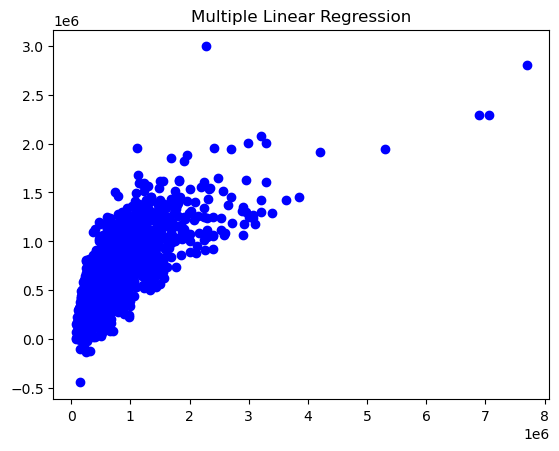

In [560]:
plt.title('Multiple Linear Regression')
plt.scatter(mlr_y_test, mlr_y_predicted, color='blue')
plt.show()

In [721]:
feature_cols = ['sqft_living','grade','sqft_above','sqft_living15']
mlr_X2 = data[feature_cols]
mlr_X2.head()

,sqft_living,grade,sqft_above,sqft_living15
0,1180,7,1180,1340
1,2570,7,2170,1690
2,770,6,770,2720
3,1960,7,1050,1360
4,1680,8,1680,1800


In [723]:
mlr_X_train2, mlr_X_test2, mlr_y_train2, mlr_y_test2 = train_test_split(mlr_X2, mlr_y, random_state=1)

In [725]:
mlinreg.fit(mlr_X_train2,mlr_y_train2)

LinearRegression()

In [727]:
mlr_y_predicted2 = mlinreg.predict(mlr_X_test2)

In [729]:
print(np.sqrt(metrics.mean_squared_error(mlr_y_test2, mlr_y_predicted2)))

269966.6359529907


worse result

In [950]:
model_file = 'mypolifit.pkl'

In [954]:
import pickle
with open(model_file, 'wb') as f:
    pickle.dump(mlinreg, f)